# Package imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as spio
from pathlib import Path
from HSI2RGB import HSI2RGB

# Load data

In [2]:
HSI_path = Path('./washington_hsi.mat')
HSI_mat = spio.loadmat(HSI_path)
HSI_data = HSI_mat['Y']
(ydim, xdim, zdim) = HSI_data.shape
# Load wavelengths of hyperspectral data
wl = np.squeeze(HSI_mat['wl']).tolist()

# Reorder data so that each column holds the spectra of of one pixel
HSI_data = np.reshape(HSI_data, [-1,zdim])/HSI_data.max()

# Use the D65 illuminant
illuminant = 65

# Do minor thresholding
threshold = 0.002

# Create and display RGB image

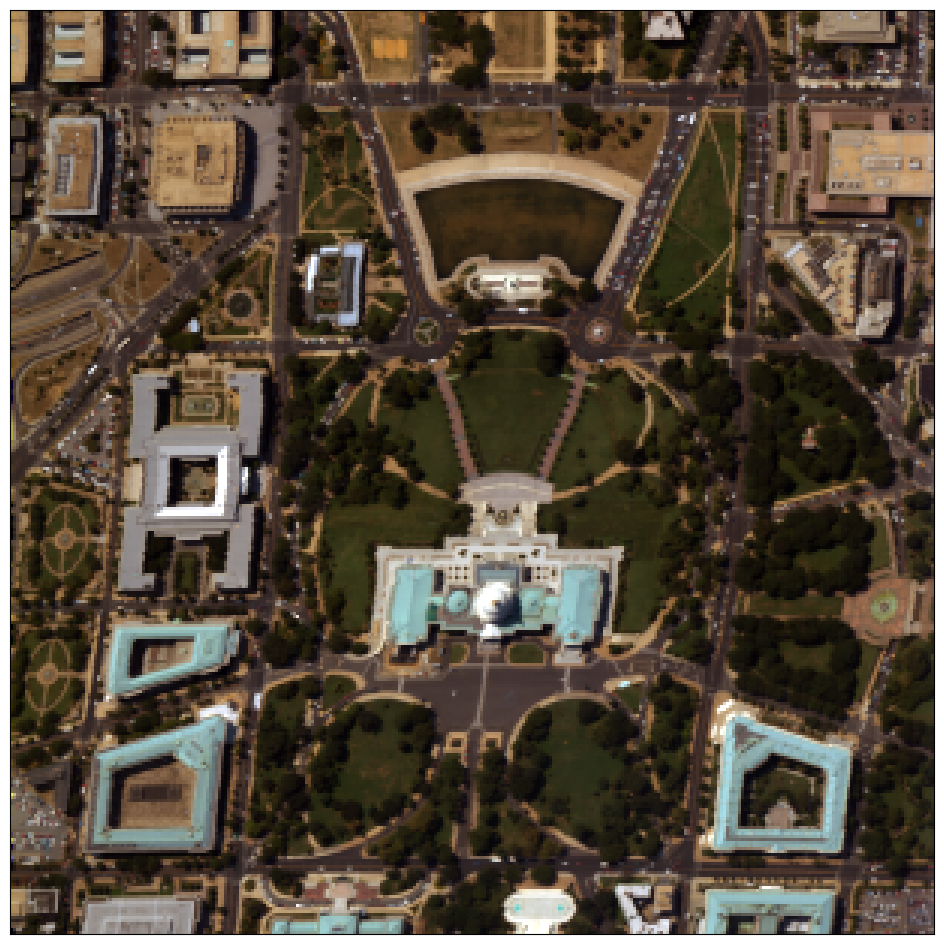

In [4]:
RGB_image = HSI2RGB(wl, HSI_data, xdim, ydim, illuminant, threshold)
plt.figure(figsize=(16,12))
plt.imshow(RGB_image)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()